In [31]:
import pandas as pd #useful for loading the dataset
import numpy as np #to perform array

In this block, we import essential Python libraries for data manipulation and array operations.

pandas (pd): Used for efficiently loading and manipulating datasets in tabular form.

numpy (np): Enables array operations and numerical computations, providing a foundation for data analysis.

These libraries are fundamental for handling the data and performing necessary operations on arrays.

## *Load Dataset*

In [32]:
dataset = pd.read_csv('salary.csv')

In this block, the code reads a dataset from a CSV file named 'salary.csv' into a Pandas DataFrame.

- `pd.read_csv('salary.csv')`: Uses the 'read_csv' function from the Pandas library to load data from the CSV file.
  Ensure that the file 'salary.csv' is present in the working directory or provide the correct file path.

The resulting DataFrame, named 'dataset', now contains the dataset from the CSV file, and it can be further explored and processed in subsequent code blocks.

## *Summarize Dataset*


In [33]:
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


This block prints essential information about the loaded dataset, providing an overview of its structure and initial entries.

- `dataset.shape`: Displays the dimensions of the dataset (number of rows, number of columns).
  It helps in understanding the size and shape of the dataset.

- `dataset.head(5)`: Prints the first 5 rows of the dataset.
  This allows for a quick examination of the dataset's structure and the initial values of its columns.

The output of these statements provides a glimpse into the dataset, aiding in further analysis and preprocessing steps.


## *Mapping Salary Data to Binary Value*

In [34]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


This block focuses on encoding the 'income' column, converting categorical values into numerical representations.

- `income_set = set(dataset['income'])`: Creates a set containing unique values in the 'income' column.
  This helps to understand the distinct income categories present in the dataset.

- `dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)`: Maps the income categories
  '<=50K' and '>50K' to numerical values (0 and 1, respectively) and converts the column to integer type.
  This transformation is often performed for binary classification tasks.

- `print(dataset.head)`: Prints the first few rows of the dataset after the income encoding.
  This allows verification of the encoding and ensures that the changes are applied correctly.

The 'income' column is now represented as numerical values, facilitating machine learning model training.

# *VISUALIZATION*

### *CORRELATION Heatmap of Features*

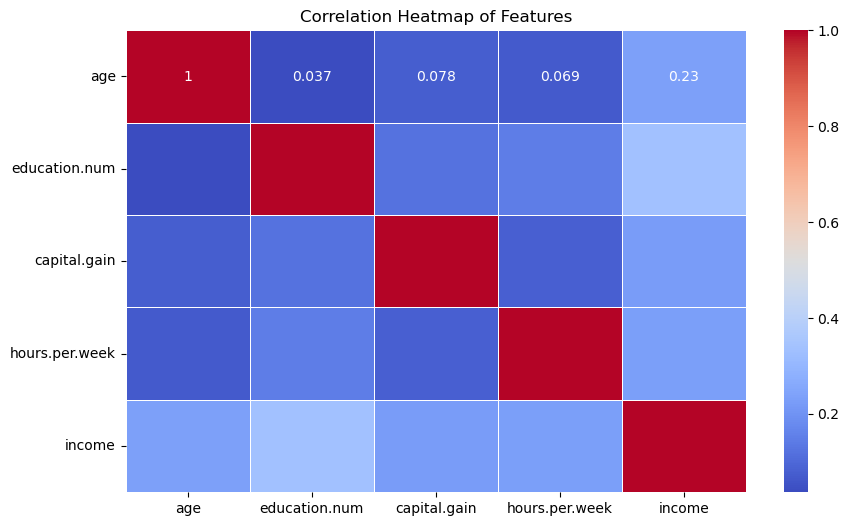

In [35]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Apply MinMax Scaling for all numerical features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dataset[['age', 'education.num', 'capital.gain', 'hours.per.week']])

# Convert back to dataframe for easier visualization
df_scaled = pd.DataFrame(scaled_features, columns=['age', 'education.num', 'capital.gain', 'hours.per.week'])

# Include the original income column
df_scaled['income'] = dataset['income']

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

This heatmap shows the correlations between different numerical features in the dataset. 

Each cell in the grid represents a correlation coefficient between two features, with values ranging from -1 (strong negative correlation) to +1 (strong positive correlation).

It helps you identify relationships between features. For instance, if two features are highly correlated, they may carry redundant information.

### *Age Distribution based on age*

C:\Users\walia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


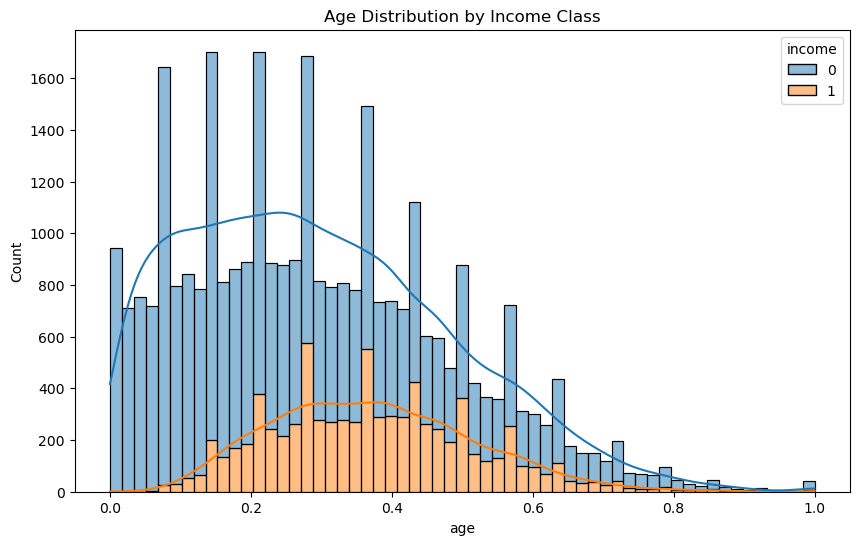

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_scaled, x='age', hue='income', multiple='stack', kde=True)
plt.title('Age Distribution by Income Class')
plt.show()

A histogram (with optional KDE - Kernel Density Estimate) that shows the distribution of individuals' ages, grouped by their income class (<=50K or >50K).

The plot uses different colors to distinguish between income categories.

This plot helps visualize how age is distributed across different income levels, which can reveal patterns (e.g., older individuals may have a higher likelihood of earning >50K).

### *Pairplot*

C:\Users\walia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\walia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\walia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\walia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

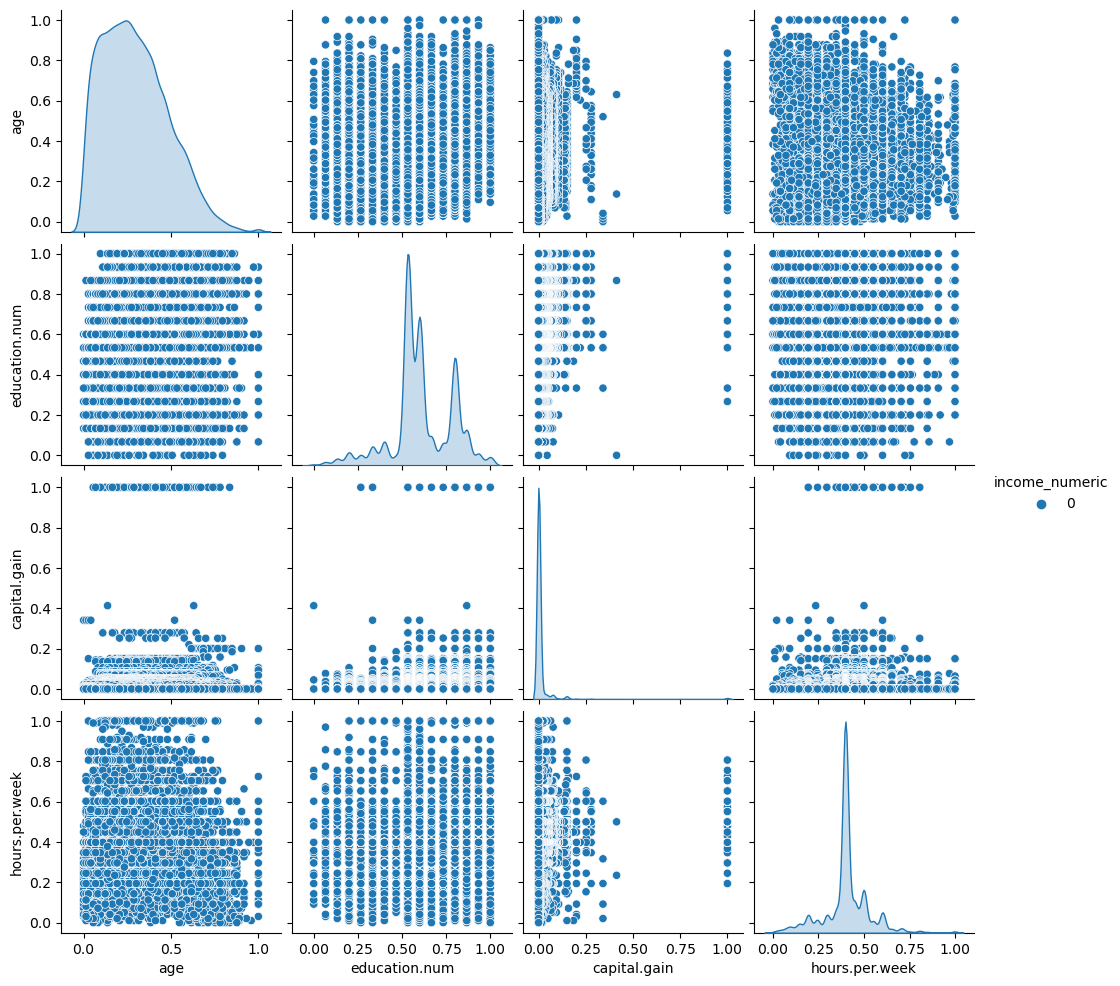

In [37]:
# Convert the 'income' column to numerical values for pair plot compatibility
df_scaled['income_numeric'] = df_scaled['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Plot pair plot for numerical features
sns.pairplot(df_scaled.drop(columns=['income']), hue='income_numeric')
plt.show()


A pair plot displays scatterplots for every pair of numerical features in the dataset, while also showing histograms or density plots along the diagonal for the individual features. 

The points are color-coded by the income category (numerical version of the income column).

This plot helps you visually explore interactions between features and observe separability between classes, useful for understanding how features relate to one another.

## *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

In [38]:
X = dataset.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In this block, we extract the feature values from the dataset and store them in the variable 'X'.
The feature values are the input variables used for training the machine learning model.

- `dataset.iloc[:, :-1].values`: Retrieves all rows and all columns except the last one (which is assumed to be the target variable).
  The feature values are extracted using the 'values' attribute, converting them into a NumPy array.

The 'X' variable now contains the feature values, and it can be used for further preprocessing and model training.

In [39]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

This block extracts the target variable (the variable to be predicted) from the dataset.
The target variable is typically denoted as 'Y' and represents the output variable in a machine learning model.

- `dataset.iloc[:, -1].values`: Retrieves all rows from the last column of the dataset.
  The target variable values are extracted using the 'values' attribute, converting them into a NumPy array.

The 'Y' variable now holds the target variable values, and it is used for model training and evaluation.

## *Splitting Dataset into Train & Test*

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

This block splits the dataset into training and testing sets, a crucial step in machine learning model development.

- `train_test_split(X, Y, test_size=0.25, random_state=0)`: Splits the feature values ('X') and target variable ('Y') into
  training and testing sets. The 'test_size' parameter determines the proportion of the dataset allocated for testing,
  and 'random_state' ensures reproducibility by fixing the random seed.

The resulting variables are:
  - 'X_train': Feature values for training
  - 'X_test': Feature values for testing
  - 'y_train': Target variable values for training
  - 'y_test': Target variable values for testing

These sets are used for training the model and evaluating its performance on unseen data.


Feature Scaling

We scale our data to make all the features contribute equally to the result

-Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data

-Transform - Transform method is transforming all the features using the respective mean and variance,

We want our test data to be a completely new and a surprise set for our model

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



Feature scaling is applied in this block to standardize the scale of the feature values.
It is a common preprocessing step to ensure that all features contribute equally to the model training.

- `StandardScaler()`: Initializes a StandardScaler object from the scikit-learn library.
  This scaler will be used to standardize the feature values.

- `sc.fit_transform(X_train)`: Computes the mean and standard deviation of the training data ('X_train') and scales it.
  The 'fit_transform' method fits the scaler to the training data and simultaneously transforms it.

- `sc.transform(X_test)`: Applies the same transformation to the testing data ('X_test') based on the parameters learned from the training data.

The 'X_train' and 'X_test' variables now contain standardized feature values, making them suitable for certain machine learning algorithms.



In [42]:
## *Finding the Best K-Value*

Text(0, 0.5, 'Mean Error')

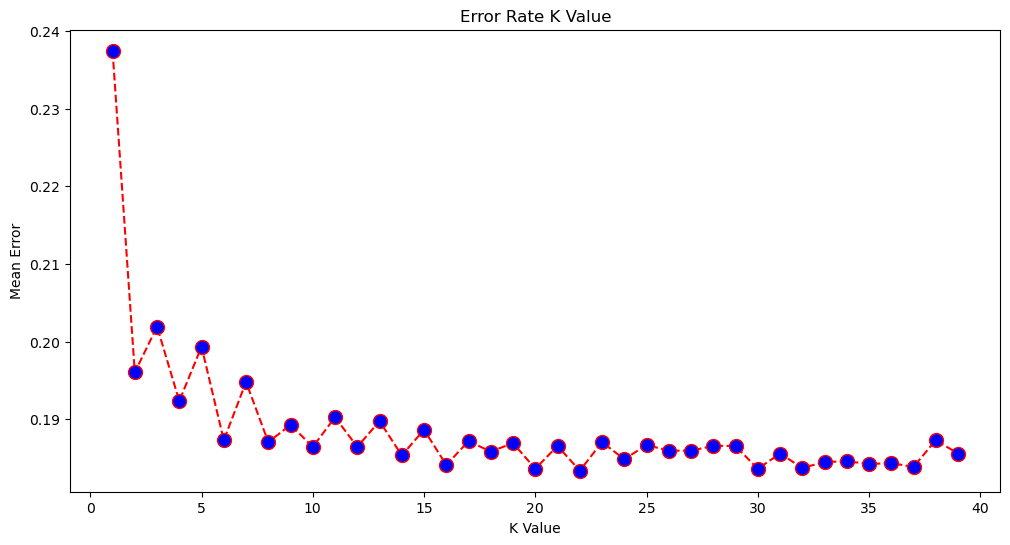

In [43]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In this block, the code iterates through different values of K in the K-Nearest Neighbors (KNN) algorithm.
The goal is to find the optimal value of K by evaluating the mean error for each K.

- `error = []`: Initializes an empty list to store mean errors for different K values.

- Loop over K values from 1 to 40:
  - Create a KNN model with the current K value.
  - Fit the model on the training data.
  - Predict the target variable on the testing data.
  - Calculate and append the mean error to the 'error' list.

- `plt.figure(figsize=(12, 6))`: Specifies the size of the plot.

- `plt.plot(...)`: Plots the mean errors against the corresponding K values.
  The plot helps visualize the relationship between K and mean error.

- `plt.title('Error Rate K Value')`: Adds a title to the plot.
- `plt.xlabel('K Value')`: Labels the x-axis.
- `plt.ylabel('Mean Error')`: Labels the y-axis.

The resulting plot aids in selecting an appropriate K value that minimizes the mean error.

In [44]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

This block initializes and trains the KNN model using scikit-learn's KNeighborsClassifier.

- `KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2)`: Creates a KNN classifier with K=2, Euclidean distance metric ('minkowski'), and power parameter p=2.
  These parameters can be adjusted based on the characteristics of the dataset.

- `model.fit(X_train, y_train)`: Fits the KNN model to the training data, where 'X_train' represents the feature values
  and 'y_train' represents the corresponding target variable values.

The 'model' variable is now trained and can be used to make predictions on new data.

## *Predicting, wheather new customer with Age & Salary will Buy or Not*

In [45]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might got Salary above 50K")
else:
  print("Customer might not got  Salary above 50K")

Enter New Employee's Age:  25
Enter New Employee's Education:  10
Enter New Employee's Captital Gain:  1500
Enter New Employee's Hour's Per week:  80


[0]
Customer might not got  Salary above 50K


This block takes input for a new employee's features, transforms them using the previously fitted scaler,
and predicts their income using the trained KNN model.

- `age = int(input("Enter New Employee's Age: "))`: Prompts the user to input the new employee's age.

- `edu = int(input("Enter New Employee's Education: "))`: Prompts the user to input the new employee's education level.

- `cg = int(input("Enter New Employee's Capital Gain: "))`: Prompts the user to input the new employee's capital gain.

- `wh = int(input("Enter New Employee's Hours Per Week: "))`: Prompts the user to input the new employee's hours per week.

- `newEmp = [[age, edu, cg, wh]]`: Creates a list containing the input features for the new employee.

- `result = model.predict(sc.transform(newEmp))`: Transforms the input features using the scaler and predicts the income using the trained KNN model.

- `print(result)`: Prints the predicted income for the new employee.

- The subsequent conditional statements determine and print whether the predicted income is above 50K or not.

This block is useful for interactively testing the trained model with new data.

## *Prediction for all Test Data*

In [50]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


This block uses the trained KNN model to make predictions on the testing set and compares them with the actual values.

- `y_pred = model.predict(X_test)`: Predicts the target variable values for the testing set using the trained KNN model.

- `np.concatenate(...)`: Concatenates the predicted values ('y_pred') and the actual values ('y_test') along the second axis (axis=1).
  This creates a side-by-side comparison of predicted and actual values.

- `print(...)`: Prints the concatenated array, providing insights into the model's performance on the testing set.

This output is particularly useful for assessing how well the model generalizes to unseen data.


## *Evaluating Model - CONFUSION MATRIX*

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[5916  277]
 [1319  629]]
Accuracy of the Model: 80.39552880481513%


This block calculates and prints the confusion matrix and accuracy score of the KNN model on the testing set.

- `from sklearn.metrics import confusion_matrix, accuracy_score`: Imports necessary functions for model evaluation.

- `cm = confusion_matrix(y_test, y_pred)`: Computes the confusion matrix by comparing actual values ('y_test') with predicted values ('y_pred').

- `print("Confusion Matrix: ")`: Displays the confusion matrix, providing information about true positives, true negatives, false positives, and false negatives.

- `print(cm)`: Prints the confusion matrix.

- `print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))`: Calculates and prints the accuracy score of the model on the testing set.
  The accuracy score represents the percentage of correctly predicted instances.

This block is crucial for assessing the overall performance of the model on the test data.



# END